# Análisis datos Airbnb Seattle - Minería de datos y el paradigma Big Data
__Autores:__
- Alberto Pastor Moreno
- Iván Fernández Mena
- Francisco Javier Melchor González

## Fase I. Business Understanding. Definición de necesidades del cliente. Comprensión del negocio.

### Objetivos del negocio

El principal objetivo del proyecto se enfoca en la resolución de la siguiente cuestión: dado un perfil host de Airbnb, un apartamento perteneciente a éste en Seattle y el mapa de espacios culturales tematizados en esta ciudad, ¿qué precio por noche aconseja nuestro sistema?

### Valoración de la situación

Este análisis utiliza datos sobre [la actividad de Airbnb en Seattle](https://www.kaggle.com/airbnb/seattle) y [espacios culturales en Seattle](https://data.seattle.gov/Community/Seattle-Cultural-Space-Inventory/hrat-v8cm)

### Objetivos de Data Mining

### Plan de proyecto

## Fase II. Data Understanding. Estudio y comprensión de los datos

### Recolectar los datos iniciales

La solución a la cuestión planteada, concentrada en el análisis predictivo, hace uso de técnicas de cruce de varios conjuntos de datos. Los conjuntos de datos abiertos utilizados a lo largo del proceso que hemos creído relevantes y nutritivos para el objetivo del proyecto se pueden encontrar a continuación: 

Los datos a utilizar en este proyecto y sus fuentes son los siguientes:
- Listado de _hosts_ de Airbnb de Seattle, calendario de reservas de estos _hosts_ y las consecuentes _reviews_ de estos hosts, extraídos de [Kaggle](https://www.kaggle.com/airbnb/seattle)
- Listado de espacios culturales de Seattle, extraídos ha sido extraído del [portal de datos abiertos de esta ciudad](https://data.seattle.gov/Community/Seattle-Cultural-Space-Inventory/hrat-v8cm)

En los siguientes apartados analizaremos meticulosamente los datos del proyecto con el objetivo de realizar una comprensión exhausta de los datos elegidos para resolver la cuestión de este proyecto.

Cargamos todos los datos contenidos en formato `.csv` descargados en local previamente.

In [1]:
airbnb_listings_filename <- "datasets//listings.csv"
airbnb_calendar_filename <- "datasets//calendar.csv"
airbnb_reviews_filename <- "datasets//reviews.csv"
cultural_spaces_filename <- "datasets//cultural_spaces.csv"

In [2]:
airbnb_listings <- read.csv(file=airbnb_listings_filename, header=TRUE, sep=",")
airbnb_calendar <- read.csv(file=airbnb_calendar_filename, header=TRUE, sep=",")
airbnb_reviews <- read.csv(file=airbnb_reviews_filename, header=TRUE, sep=",")
cultural_spaces <- read.csv(file=cultural_spaces_filename, header=TRUE, sep=",")

### Descripción de los datos 

Para profundizar en la composición de los conjuntos de datos a tratar en este proyecto, analizaremos los atributos de cada uno de los conjuntos de datos cargados a continuación

#### Casas de Airbnb en Seattle

Primero, analizaremos el conjunto de datos `airbnb_listings`, el cual expone por cada fila la información completa que procesa de un _listing_ perteneciente a un _host_ de Seattle Airbnb, siendo esta la siguiente:
LISTAR Y DEFINIR CADA ATRIBUTO DEL DATASET

In [11]:
names(airbnb_listings)

[1] "id"                               "listing_url"                     
 [3] "scrape_id"                        "last_scraped"                    
 [5] "name"                             "summary"                         
 [7] "space"                            "description"                     
 [9] "experiences_offered"              "neighborhood_overview"           
[11] "notes"                            "transit"                         
[13] "thumbnail_url"                    "medium_url"                      
[15] "picture_url"                      "xl_picture_url"                  
[17] "host_id"                          "host_url"                        
[19] "host_name"                        "host_since"                      
[21] "host_location"                    "host_about"                      
[23] "host_response_time"               "host_response_rate"              
[25] "host_acceptance_rate"             "host_is_superhost"               
[27] "host_thumbnail_url"               "host_picture_url"                
[29] "host_neighbourhood"               "host_listings_count"             
[31] "host_total_listings_count"        "host_verifications"              
[33] "host_has_profile_pic"             "host_identity_verified"          
[35] "street"                           "neighbourhood"                   
[37] "neighbourhood_cleansed"           "neighbourhood_group_cleansed"    
[39] "city"                             "state"                           
[41] "zipcode"                          "market"                          
[43] "smart_location"                   "country_code"                    
[45] "country"                          "latitude"                        
[47] "longitude"                        "is_location_exact"               
[49] "property_type"                    "room_type"                       
[51] "accommodates"                     "bathrooms"                       
[53] "bedrooms"                         "beds"                            
[55] "bed_type"                         "amenities"                       
[57] "square_feet"                      "price"                           
[59] "weekly_price"                     "monthly_price"                   
[61] "security_deposit"                 "cleaning_fee"                    
[63] "guests_included"                  "extra_people"                    
[65] "minimum_nights"                   "maximum_nights"                  
[67] "calendar_updated"                 "has_availability"                
[69] "availability_30"                  "availability_60"                 
[71] "availability_90"                  "availability_365"                
[73] "calendar_last_scraped"            "number_of_reviews"               
[75] "first_review"                     "last_review"                     
[77] "review_scores_rating"             "review_scores_accuracy"          
[79] "review_scores_cleanliness"        "review_scores_checkin"           
[81] "review_scores_communication"      "review_scores_location"          
[83] "review_scores_value"              "requires_license"                
[85] "license"                          "jurisdiction_names"              
[87] "instant_bookable"                 "cancellation_policy"             
[89] "require_guest_profile_picture"    "require_guest_phone_verification"
[91] "calculated_host_listings_count"   "reviews_per_month"

In [12]:
dim(airbnb_listings)

[1] 3818   92

Como podemos ver, el dataset tiene 92 atributos y 3818 filas. A continuación, vemos un ejemplo de una fila del dataset para obtener un primer vistazo sobre cómo se comportan los atributos.

In [13]:
airbnb_listings[1,]

id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
241032,https://www.airbnb.com/rooms/241032,2.01601e+13,2016-01-04,Stylish Queen Anne Apartment,,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,,...,10,f,NA,WASHINGTON,f,moderate,f,f,2,4.07


#### Calendario de reservas de Airbnb en Seattle

A continuación, haremos el mismo proceso con el conjunto de datos `airbnb_calendar`, el cual almacena información sobre todas las reservas realizadas en Airbnb sobre _hosts_ de Seattle.

In [14]:
names(airbnb_calendar)

[1] "listing_id" "date"       "available"  "price"

In [15]:
dim(airbnb_calendar)

[1] 1393570       4

Este dataset considera 1393570 filas con 4 atributos cada una de ellas con la siguiente interpretación:
- `listing_id`: id en el sistema de Airbnb del _listing_ al cual se corresponde la reserva.
- `date`: día, mes y año.
- `available`: disponibilidad del _listing_ en esta fecha.
- `price`: precio con el cual se oferta el _listing_ en esta fecha.

#### Reviews de Airbnb en Seattle

Realizamos el mismo proceso con el conjunto de datos `airbnb_reviews`, el cual contiene todas las reviews realizadas en Airbnb sobre _listings_ de Seattle.

In [19]:
names(airbnb_reviews)

[1] "listing_id"    "id"            "date"          "reviewer_id"  
[5] "reviewer_name" "comments"

In [ ]:
dim(airbnb_reviews)

El dataset considera X reviews realizadas; cada una de ellas contiene los siguientes atributos:
- `listing_id`: id en el sistema de Airbnb para el _listing_ sobre el cual se realiza la _review_.
- `id`: id en el sistema de Airbnb para la _review_.
- `date`: día, mes y año en el cual se envió la _review_ al sistema.
- `reviewer_id`: id en el sistema de Airbnb de la persona que escribió la _review_.
- `reviewer_name`: nombre de pila de la persona que escribió la _review_.
- `comments`: comentarios agregados a la _review_.

In [20]:
airbnb_reviews[1:5,]

listing_id,id,date,reviewer_id,reviewer_name,comments
7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time. Went for a walk and found Seattle Center with a major food festival in progress. What a treat. Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had! Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. The apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


#### Espacios culturales de Seattle

Procesamos con la misma metodología el conjunto de datos `cultural_spaces`, el cual nos muestra información sobre los espacios culturales de Seattle con los siguientes atributos:
LISTAR Y DEFINIR CADA ATRIBUTO DEL DATASET

In [21]:
names(cultural_spaces)

[1] "ï..Name"                                                      
 [2] "Phone"                                                        
 [3] "URL"                                                          
 [4] "Square.Feet.Total"                                            
 [5] "Neighborhood"                                                 
 [6] "Organization.Type"                                            
 [7] "Dominant.Discipline"                                          
 [8] "Year.of.Occupation"                                           
 [9] "Rent.vs.Own"                                                  
[10] "Age.of.Current.Building"                                      
[11] "Length.of.Lease..Date."                                       
[12] "Year.Organization.Founded"                                    
[13] "Number.of.Past.Facilities"                                    
[14] "Stages.and.Theaters"                                          
[15] "Stage...Theater.Seats"                                        
[16] "Gallery.Space"                                                
[17] "Gallery.Square.Feet"                                          
[18] "ADA.Compliant"                                                
[19] "Available.Parking"                                            
[20] "Street.Presence"                                              
[21] "Rental.Space"                                                 
[22] "Alcohol.Sales"                                                
[23] "Organization.Mission"                                         
[24] "Funded.by.A.C"                                                
[25] "Funded.by.4Culture"                                           
[26] "Stability.Index..5.very.stable..1.very.uncertain."            
[27] "Control.Index..5.very.in.control..1...very.out.of.control.."  
[28] "Constituency.over.50..one.race"                               
[29] "Specific.Demographics.and.Community"                          
[30] "Organization.Leadership"                                      
[31] "Organization.Artists"                                         
[32] "Closed.Date"                                                  
[33] "Closed."                                                      
[34] "Address"                                                      
[35] "Location"                                                     
[36] "X2010.Census.Tracts"                                          
[37] "Seattle.Police.Department.Micro.Community.Policing.Plan.Areas"
[38] "City.Council.Districts"                                       
[39] "SPD.Beats"                                                    
[40] "Zip.Codes"

In [22]:
dim(cultural_spaces)

[1] 1202   40

In [26]:
head(cultural_spaces, n=3

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: head(cultural_spaces, n=3
   ^


### Exploración de los datos 

Con el objetivo de conocer cómo se comportan cada uno de los atributos de los dataset a utilizar y así facilitar y enriquecer las siguientes fases del proceso de Data Mining, realizaremos una exploración de los datos de cada uno de los datasets. Para ello, utilizaremos el paquete `psych`

In [4]:
if(!require(psych)){
    install.packages("psych")
    library(psych)
}

Loading required package: psych


#### Casas de Airbnb en Seattle

In [10]:
describe(airbnb_listings)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1,3818,5.550111e+06,2.962660e+06,6.118244e+06,5.667467e+06,3.391922e+06,3.33500e+03,1.034016e+07,10336830,-0.309538606,-1.1053159,4.794727e+04
listing_url*,2,3818,1.909500e+03,1.102306e+03,1.909500e+03,1.909500e+03,1.415142e+03,1.00000e+00,3.818000e+03,3817,0.000000000,-1.2009429,1.783956e+01
scrape_id,3,3818,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,0.000000e+00,2.01601e+13,2.016010e+13,0,NaN,NaN,0.000000e+00
last_scraped*,4,3818,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.00000e+00,1.000000e+00,0,NaN,NaN,0.000000e+00
name*,5,3818,1.894388e+03,1.094536e+03,1.892500e+03,1.893998e+03,1.406987e+03,1.00000e+00,3.792000e+03,3791,0.002566002,-1.2012592,1.771382e+01
summary*,6,3818,1.661355e+03,1.048871e+03,1.663500e+03,1.658304e+03,1.367698e+03,1.00000e+00,3.479000e+03,3478,0.012729896,-1.2332725,1.697477e+01
space*,7,3818,1.318509e+03,1.000582e+03,1.277500e+03,1.281699e+03,1.372888e+03,1.00000e+00,3.120000e+03,3119,0.153621359,-1.3057483,1.619328e+01
description*,8,3818,1.870322e+03,1.080957e+03,1.876500e+03,1.870531e+03,1.394385e+03,1.00000e+00,3.742000e+03,3741,-0.002999117,-1.2052510,1.749405e+01
experiences_offered*,9,3818,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.00000e+00,1.000000e+00,0,NaN,NaN,0.000000e+00
neighborhood_overview*,10,3818,9.155288e+02,8.323198e+02,7.985000e+02,8.522749e+02,1.182373e+03,1.00000e+00,2.507000e+03,2506,0.373749651,-1.2763043,1.347014e+01


#### Calendario de reservas de Airbnb en Seattle

In [7]:
head(airbnb_calendar, n=5)

listing_id,date,available,price
241032,2016-01-04,t,$85.00
241032,2016-01-05,t,$85.00
241032,2016-01-06,f,
241032,2016-01-07,f,
241032,2016-01-08,f,


In [11]:
describe(airbnb_calendar)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
listing_id,1,1393570,5.550111e+06,2.962274e+06,6118244,5.667756e+06,3391921.9320,3335,10340165,10336830,-0.3096599,-1.104326,2.509347e+03
date*,2,1393570,1.830000e+02,1.053661e+02,183,1.830000e+02,134.9166,1,365,364,0.0000000,-1.200021,8.925578e-02
available*,3,1393570,1.670610e+00,4.699919e-01,2,1.713263e+00,0.0000,1,2,1,-0.7260121,-1.472908,3.981310e-04
price*,4,1393570,2.072390e+02,2.537548e+02,61,1.767511e+02,88.9560,1,670,669,0.8323335,-1.032554,2.149561e-01


Como podemos ver, el atributo `available` se comporta como un booleano en el dataset. Además, el atributo `price` fluctúa entre 1$ y 670$ con mediana 61$.

In [1]:
nrow(airbnb_calendar[airbnb_calendar['available'] == 't',])

ERROR: Error in eval(expr, envir, enclos): object 'airbnb_calendar' not found


Como podemos ver, en 2016 en Seattle hubo un total de X fechas en listings no reservadas.

In [17]:
nrow(airbnb_calendar[airbnb_calendar['listing_id'] == 241032 & airbnb_calendar['available'] == 't',])

[1] 346

La última ejecución nos muestra que 346 días del año 2016 el listing _241032_ no fue reservado, por lo tanto, tuvo una actividad muy baja. 

#### Reviews de Airbnb en Seattle

In [6]:
head(airbnb_reviews, n=5)

listing_id,id,date,reviewer_id,reviewer_name,comments
7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time. Went for a walk and found Seattle Center with a major food festival in progress. What a treat. Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had! Didn't really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. The apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


Exceptuando los ids y la fecha, todos los campos son textuales no estructurados (`reviewer_name` y `comments`), por lo tanto, la exploración se reduce en gran medida; no hay ninguna estructura que explorar.

#### Espacios culturales de Seattle

In [16]:
describe(cultural_spaces)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Name*,1,1202,5.987072e+02,3.461480e+02,598.5,5.987723e+02,444.7800,1,1197,1196,-0.000814360,-1.2056053,9.984116e+00
Phone*,2,1202,2.085208e+02,2.300161e+02,116.5,1.807432e+02,171.2403,1,697,696,0.668082656,-1.0205702,6.634466e+00
URL*,3,1202,2.100657e+02,2.282948e+02,122.5,1.850468e+02,180.1359,1,677,676,0.611965479,-1.1428691,6.584817e+00
Square.Feet.Total,4,666,3.003769e+04,2.113811e+05,3000.0,5.572727e+03,3298.7850,0,4007000,4007000,14.822892776,244.6015244,8.190851e+03
Neighborhood*,5,1202,1.337105e+01,2.046651e+01,1.0,8.836798e+00,0.0000,1,69,68,1.566808348,1.0078067,5.903255e-01
Organization.Type*,6,1202,5.609817e+00,4.942299e+00,6.0,5.262994e+00,7.4130,1,13,12,0.524544670,-1.3400827,1.425531e-01
Dominant.Discipline*,7,1202,1.243261e+01,5.082094e+00,14.0,1.271726e+01,5.9304,1,19,18,-0.457841361,-0.9684228,1.465853e-01
Year.of.Occupation,8,674,1.979165e+03,1.886136e+02,2005.0,2.001689e+03,10.3782,2,2017,2015,-10.204414345,103.8071769,7.265125e+00
Rent.vs.Own*,9,1202,2.608985e+00,1.754315e+00,2.0,2.498960e+00,1.4826,1,6,5,0.508756271,-1.4898438,5.060056e-02
Age.of.Current.Building,10,651,1.935845e+03,1.655285e+02,1950.0,1.948835e+03,44.4780,1,2015,2014,-10.456361504,113.3902109,6.487573e+00


In [8]:
head(cultural_spaces, n=5)

Name,Phone,URL,Square.Feet.Total,Neighborhood,Organization.Type,Dominant.Discipline,Year.of.Occupation,Rent.vs.Own,Age.of.Current.Building,⋯,Organization.Artists,Closed.Date,Closed.,Address,Location,X2010.Census.Tracts,Seattle.Police.Department.Micro.Community.Policing.Plan.Areas,City.Council.Districts,SPD.Beats,Zip.Codes
Bootstrap Music,,,NA,,,Studios,NA,,NA,⋯,,,0,,,NA,NA,NA,NA,NA
Ghost Gallery,(206) 832-6063,www.ghostgalleryart.com,900,Capitol Hill,N,Visual,2010,R,1926,⋯,,,0,504 E Denny Way Seattle WA 98122,"(47.6186813, -122.3249251)",NA,8,NA,5,18376
Chihuly Garden and Glass,,,NA,,,Visual,NA,,NA,⋯,,,0,305 Harrison St Seattle WA 98109,"(47.6205686, -122.350491)",NA,50,NA,40,18390
Dynamic Sound Service,,,NA,,,Studios,NA,,NA,⋯,,,NA,,,NA,NA,NA,NA,NA
Golden Oldies,,,NA,,,Music,NA,,NA,⋯,,,0,201 NE 45th St Seattle WA 98105,"(47.66116, -122.326927)",NA,61,NA,3,18383


In [9]:
tail(cultural_spaces, n=5)

,Name,Phone,URL,Square.Feet.Total,Neighborhood,Organization.Type,Dominant.Discipline,Year.of.Occupation,Rent.vs.Own,Age.of.Current.Building,⋯,Organization.Artists,Closed.Date,Closed.,Address,Location,X2010.Census.Tracts,Seattle.Police.Department.Micro.Community.Policing.Plan.Areas,City.Council.Districts,SPD.Beats,Zip.Codes
1198,Westminster Chapel,,,NA,,,Preservation,NA,,NA,⋯,,,0,13646 NE 24th St Bellevue WA 98005,"(47.63285, -122.157087)",NA,NA,NA,NA,31850
1199,Woodinville Repertory Theatre,(206) 510-6304,www.woodinvillerep.org,NA,,,Performance,NA,,NA,⋯,,,0,16120 Redmond-Woodinville Rd NE #15 Woodinville WA 98072,"(47.744744, -122.158388)",NA,NA,NA,NA,18071
1200,UMO Ensemble,(206) 408-8059,www.umo.org,NA,,,Performance,NA,,NA,⋯,,,0,"18870 SW 103rd Ave SW, Vashon WA 98070","(47.433761, -122.464157)",NA,NA,NA,NA,18068
1201,Washington Old Time Fiddlers Association,,,NA,,,Music,NA,,NA,⋯,,,0,18418 112th Avenue SE Renton WA 98055,"(47.437241, -122.190124)",NA,NA,NA,NA,17808
1202,Valley Center Stage,(425) 831-5667,www.intuitivelearningsys.org,NA,,,Performance,NA,,NA,⋯,,,0,119 West North Bend Way North Bend WA 98045,"(47.494937, -121.786457)",NA,NA,NA,NA,17798


In [23]:
nrow(cultural_spaces)

[1] 1202

In [30]:
# Cuenta la cantidad de filas que no son NA
sum(is.na(cultural_spaces$Year.of.Occupation))

[1] 528

Lo primero que nos llama la atención es la gran cantidad de NAs que tiene el dataset en algunos campos que podrían ser interesantes, algo que se analizará con más precisión en el siguiente apartado correspondiente a calidad de los datos. La estructura de muchos atributos es confusa; a pesar de ello, encontramos que la localización (`Location`)está representada en un formato válido para nuestro análisis ya que expone la longitud y la latitud del espacio cultural, algo que nos será muy útil. Otro atributo que consideramos realmente útil es `Dominant.Discipline`, el cual tiene el siguiente comportamiento:

In [17]:
table(cultural_spaces$Dominant.Discipline)


                                         
                                       3 
Arts/Cultrual Administration or Advocacy 
                                       1 
Arts/Cultural Administration or Advocacy 
                                      39 
     Arts/Cultural Training or Education 
                                     143 
    Arts/Cultural Training or Education  
                                       1 
                                  Cinema 
                                      25 
                        Community Center 
                                      51 
                               Education 
                                      14 
                                Heritage 
                                      57 
                                Literary 
                                      78 
                               Live/Work 
                                      12 
                               Multi-use 
                                 

Encontramos múltiples categorías que podrían ser de utilidad en nuestro análisis; gracias a este atributo podemos conocer qué espacios culturales se dedican a la música, a la educación o son multiuso.

### Calidad de los datos 

La calidad de los datos de los datasets que tratamos la definiremos según la precisión, la completitud y la consistencia de sus datos. Para determinar qué calidad tienen los datos elegidos para la resolución de la cuestión de este proyecto, realizamos varios análisis en las siguientes líneas de código.

#### Casas de Airbnb en Seattle

#### Calendario de reservas de Airbnb en Seattle

#### Reviews de Airbnb en Seattle

In [18]:
nrow(airbnb_reviews)

[1] 84849

In [36]:
sum(is.na(airbnb_reviews$comments))

[1] 0

In [37]:
sum(airbnb_reviews$comments == "")

[1] 17

La calidad de los datos del dataset de reviews de casas de Airbnb de Seattle utilizado es muy buena, apenas 17 reviews de 84849 son inválidas.

#### Espacios culturales de Seattle

## Fase III. Data Preparation. Análisis de los datos y selección de características

Antes de comenzar el análisis de los datos de nuestros datasets, cargamos todos los paquetes necesarios para ello en las siguientes líneas de código. FALTA EXPLICACIÓN DE CADA PAQUETE.

In [ ]:
if(!require(corrplot)){
    install.packages("corrplot")
    library(corrplot)
}
if(!require(dplyr)){
    install.packages("dplyr")
    library(dplyr)
}
if(!require(lattice)){
    install.packages("lattice")
    library(lattice) 
}
if(!require(ggplot2)){
    install.packages("ggplot2")
    library(ggplot2) 
}
if(!require(GGally)){
    install.packages("GGally")
    library(GGally)
}

### Seleccion de los datos y variables

Se analizará cada una de las columnas o variables de los diferentes dataset y su relevancia para nuestro problema para conocer qué variables es necesario eliminar ya que no aportan valor al posterior analisis y creación de modelos. Aunque en este apartado se realice una hipótesis sobre qué variables seleccionar, este conjunto de variables puede cambiar tras la construcción de modelos con el fin de obtener mejores resultados, si fuera necesario.

#### Casas de Airbnb en Seattle

En el caso del listado de casas de Airbnb, eliminamos todas aquellas variables que hemos considerado que no tienen relevancia en nuestro análisis, bien ya sea porque consideramos que su estado no afecta al precio o bien porque son variables que almacena Airbnb para el funcionamiento de su sistema, como por ejemplo la primera review que tuvo la casa, todos los ids que no fueran del listing, prácticamente todos los datos del perfil del host a excepción de si es superhost o no, ratios de actividad del host o urls a imágenes. Por lo tanto, se han mantenido diferentes variables que determinaban aspectos muy determinantes para el análisis propuesto, como todas aquellas que están relacionadas con las características explícitas de la casa. Además, se han tenido en cuenta variables con impacto indirecto sobre el problema, como la puntuación media las reviews por mes de la casa, ya que pueden ser muy interesantes. También eliminamos algunas variables que son redundantes, como aquellas de localización `country`, `state`, `city` o `country_code`, ya que en el contexto de nuestro problema no vamos a considerar otros países o ciudades; solo utilizaremos `zipcode` y `latitude`-`longitude` para conocer la localización de la casa, ya que podremos cruzar con el resto de datasets utilizando estos campos.

In [6]:
# Se seleccionan las variables que no se van tener en cuenta en la construcción del dataset
remove_listings <- c('listing_url','scrape_id','last_scraped','name','summary','space','description',
                     'experiences_offered','neighborhood_overview','notes','transit','thumbnail_url','medium_url',
                     'picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_location',
                     'host_about','host_response_time','host_response_rate','host_acceptance_rate',
                     'host_thumbnail_url','host_picture_url','host_neighbourhood', 'host_listings_count',
                     'host_total_listings_count','neighbourhood', 'neighbourhood_group_cleansed', 'is_location_exact',
                     'street','city','state', 'market','smart_location','country_code','country', 'security_deposit',
                     'guests_included', 'extra_people','minimum_nights','maximum_nights','has_availability',
                     'calendar_updated','availability_30','availability_60','availability_90','availability_365',
                     'review_scores_accuracy', 'requires_license', 'require_guest_phone_verification',
                     'calculated_host_listings_count','calendar_last_scraped','first_review',
                     'last_review','license','jurisdiction_names','host_verifications', 'weekly_price','monthly_price'
                     'instant_bookable','cancellation_policy','require_guest_profile_picture')

airbnb_listings_pre <- airbnb_listings[ , !(names(airbnb_listings) %in% remove_listings)]

El dataset ha quedado de la siguiente manera:

In [10]:
names(airbnb_listings_pre)

[1] "id"                               "host_location"                   
 [3] "host_is_superhost"                "host_neighbourhood"              
 [5] "host_listings_count"              "host_total_listings_count"       
 [7] "host_verifications"               "host_has_profile_pic"            
 [9] "host_identity_verified"           "street"                          
[11] "neighbourhood"                    "city"                            
[13] "state"                            "zipcode"                         
[15] "market"                           "smart_location"                  
[17] "country_code"                     "country"                         
[19] "latitude"                         "longitude"                       
[21] "is_location_exact"                "property_type"                   
[23] "room_type"                        "accommodates"                    
[25] "bathrooms"                        "bedrooms"                        
[27] "beds"                             "bed_type"                        
[29] "amenities"                        "square_feet"                     
[31] "price"                            "weekly_price"                    
[33] "monthly_price"                    "security_deposit"                
[35] "cleaning_fee"                     "guests_included"                 
[37] "extra_people"                     "minimum_nights"                  
[39] "maximum_nights"                   "has_availability"                
[41] "number_of_reviews"                "review_scores_rating"            
[43] "review_scores_accuracy"           "review_scores_cleanliness"       
[45] "review_scores_checkin"            "review_scores_communication"     
[47] "review_scores_location"           "review_scores_value"             
[49] "requires_license"                 "require_guest_phone_verification"
[51] "calculated_host_listings_count"   "reviews_per_month"

#### Calendario de reservas de Airbnb en Seattle

En el caso del calendario se ha procedido a mantener todo el conjunto de variables, dado que la cantidad de variables es muy pequeña y todas ellas pueden tener un impacto positivo sobre el análisis.

In [7]:
airbnb_calendar_pre <- airbnb_calendar

El dataset ha quedado de la siguiente manera:

In [11]:
names(airbnb_calendar_pre)

[1] "listing_id" "date"       "available"  "price"

#### Reviews de Airbnb en Seattle

La utilidad de este dataset en nuestro análisis se ve limitada ya que no realizaremos procesamiento de textos sobre el atributo `comments`, único atributo de valor del dataset, debido a que escapa de nuestros objetivos. Además, tampoco utilizaremos este dataset para realizar agregaciones como haremos con el resto de datasets, ya que el dataset _listings_ ya contiene todoa la información sobre reviews que nos gustaría tratar. Por ello, decidimos no continuar utilizando este dataset de ahora en adelante en nuestra implementación. La siguiente línea borra el dataset cargado para aligerar la memoria y facilitar los próximos cálculos.

In [25]:
rm(airbnb_reviews)

#### Espacios culturales de Seattle

En el caso de los espacios culturales consideramos importante seleccionar las variables que son derivadas de la localizacion, determinante para cruzarlas con la localizacion del airbnb que queremos estudiar. Para ello, consideraremos la localización por `Zip.Code` y por `Location`, así como hemos hecho en el dataset _listings_.  Además, seleccionamos también el atributo `Dominant.Discipline` ya que en los siguientes apartados realizaremos agregaciones con él debido a su gran valor. En las siguientes líneas de código borramos todos los campos que no sean estos. Consideramos únicamente estos campos por los motivos mencionados además de la baja calidad del resto de campos.

In [ ]:
remove_spaces <- c('Name','Phone','URL','Square.Feet.Total','Neighborhood','Organization.Type',
                   'Year.of.Occupation','Rent.vs.Own','Age.of.Current.Building','Length.of.Lease..Date.',
                   'Year.Organization.Founded','Number.of.Past.Facilities','Stages.and.Theaters',
                   'Stage...Theater.Seats','Gallery.Space','Gallery.Square.Feet','ADA.Compliant',
                   'Available.Parking','Street.Presence','Rental.Space','Alcohol.Sales',
                   'Organization.Mission','Funded.by.A.C','Funded.by.4Culture',
                   'Stability.Index..5.very.stable..1.very.uncertain.',
                   'Control.Index..5.very.in.control..1...very.out.of.control..',
                   'Constituency.over.50..one.race','Specific.Demographics.and.Community',
                   'Organization.Leadership','Organization.Artists''Closed.Date''Closed.',
                   'Address','Location','X2010.Census.Tracts',
                   'Seattle.Police.Department.Micro.Community.Policing.Plan.Areas',
                   'City.Council.Districts','SPD.Beats')

cultural_spaces_pre <- cultural_spaces[ , !(names(cultural_spaces) %in% remove_spaces)]

El dataset ha quedado de la siguiente manera:

In [ ]:
names(cultural_spaces_pre) 

### Limpieza de datos

In [14]:
airbnb_listings_pre

id,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
241032,"Seattle, Washington, United States",f,Queen Anne,3,3,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",...,10,10,10,10,9,10,f,f,2,4.07
953595,"Seattle, Washington, United States",t,Queen Anne,6,6,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",t,t,"7th Avenue West, Seattle, WA 98119, United States",...,10,10,10,10,10,10,f,t,6,1.48
3308979,"Seattle, Washington, United States",f,Queen Anne,2,2,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",...,10,10,10,10,10,10,f,f,2,1.15
7421966,"Seattle, Washington, United States",f,Queen Anne,1,1,"['email', 'phone', 'facebook', 'reviews', 'jumio']",t,t,"8th Avenue West, Seattle, WA 98119, United States",...,NA,NA,NA,NA,NA,NA,f,f,1,NA
278830,"Seattle, Washington, United States",f,Queen Anne,2,2,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",...,9,9,10,10,9,9,f,f,1,0.89
5956968,"Seattle, Washington, United States",f,Queen Anne,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"West Comstock Street, Seattle, WA 98119, United States",...,10,10,10,10,10,10,f,f,1,2.45
1909058,"Seattle, Washington, United States",t,Queen Anne,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,"10th Avenue West, Seattle, WA 98119, United States",...,10,10,10,10,10,10,f,f,1,2.46
856550,"Seattle, Washington, United States",t,Queen Anne,5,5,"['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']",t,t,"West Wheeler Street, Seattle, WA 98119, United States",...,10,10,10,10,9,10,f,t,5,4.73
4948745,"Seattle, Washington, United States",f,Queen Anne,1,1,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']",t,t,"Queen Anne Avenue North, Seattle, WA 98109, United States",...,10,9,10,9,10,10,f,f,1,1.22
2493658,"Seattle, Washington, United States",t,Queen Anne,6,6,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",t,t,"7th Avenue West, Seattle, WA 98119, United States",...,10,10,10,10,10,9,f,t,6,1.55


In [15]:
airbnb_calendar_pre

listing_id,date,available,price
241032,2016-01-04,t,$85.00
241032,2016-01-05,t,$85.00
241032,2016-01-06,f,
241032,2016-01-07,f,
241032,2016-01-08,f,
241032,2016-01-09,f,
241032,2016-01-10,f,
241032,2016-01-11,f,
241032,2016-01-12,f,
241032,2016-01-13,t,$85.00


### Estruturado de datos

In [16]:
df <- select(airbnb_listings, host_response_rate, host_acceptance_rate,
               host_listings_count, zipcode, property_type,room_type,accommodates,bathrooms,bedrooms,
               beds,price,number_of_reviews,review_scores_rating,cancellation_policy, 
               reviews_per_month)

ERROR: Error in select(airbnb_listings, host_response_rate, host_acceptance_rate, : no se pudo encontrar la función "select"


In [17]:
head(df)

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

In [40]:
# Numbers of NaN values
sapply(df, function(df) sum(is.na(df)))

host_response_rate host_acceptance_rate  host_listings_count 
                   0                    0                    2 
             zipcode        property_type            room_type 
                   0                    0                    0 
        accommodates            bathrooms             bedrooms 
                   0                   16                    6 
                beds                price    number_of_reviews 
                   1                    0                    0 
review_scores_rating  cancellation_policy    reviews_per_month 
                 647                    0                  627

In [41]:
# Number of rows before omit NaN
count(df)

n
3818


In [42]:
df2 <- na.omit(df)

In [43]:
# Number of rows after omit NaN
nrow(df2)

n
3153


In [44]:
levels(df2$property_type)

[1] ""                "Apartment"       "Bed & Breakfast" "Boat"           
 [5] "Bungalow"        "Cabin"           "Camper/RV"       "Chalet"         
 [9] "Condominium"     "Dorm"            "House"           "Loft"           
[13] "Other"           "Tent"            "Townhouse"       "Treehouse"      
[17] "Yurt"

In [45]:
levels(df2$room_type)

[1] "Entire home/apt" "Private room"    "Shared room"

In [46]:
levels(df2$cancellation_policy)

[1] "flexible" "moderate" "strict"

In [47]:
df2$property_type = factor(df2$property_type, levels = levels(df2$property_type), labels = seq(1,17))

In [48]:
df2$room_type = factor(df2$room_type, levels = levels(df2$room_type), labels = seq(1,3))

In [49]:
df2$cancellation_policy = factor(df2$cancellation_policy, levels = levels(df2$cancellation_policy), labels = seq(1,3))

In [50]:
head(df2)

,host_response_rate,host_acceptance_rate,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
1,96%,100%,3,98119,2,1,4,1.0,1,1,$85.00,207,95,2,4.07
2,98%,100%,6,98119,2,1,4,1.0,1,1,$150.00,43,96,3,1.48
3,67%,100%,2,98119,11,1,11,4.5,5,7,$975.00,20,97,3,1.15
5,100%,N/A,2,98119,11,1,6,2.0,3,3,$450.00,38,92,3,0.89
6,N/A,N/A,1,98119,11,2,2,1.0,1,1,$120.00,17,95,3,2.45
7,100%,100%,1,98119,11,2,2,1.0,1,1,$80.00,58,99,2,2.46


In [51]:
levels(df2$host_response_rate)[length(levels(df2$host_response_rate))] <- "0%"
levels(df2$host_acceptance_rate)[length(levels(df2$host_acceptance_rate))] <- "0%"

In [52]:
levels(df2$host_response_rate)

[1] ""     "100%" "17%"  "25%"  "30%"  "31%"  "33%"  "38%"  "40%"  "43%" 
[11] "50%"  "53%"  "55%"  "56%"  "57%"  "58%"  "60%"  "63%"  "64%"  "65%" 
[21] "67%"  "68%"  "69%"  "70%"  "71%"  "75%"  "76%"  "78%"  "80%"  "81%" 
[31] "82%"  "83%"  "86%"  "87%"  "88%"  "89%"  "90%"  "91%"  "92%"  "93%" 
[41] "94%"  "95%"  "96%"  "97%"  "98%"  "99%"  "0%"

In [53]:
levels(df2$host_response_rate) <- gsub(".$", "", levels(df2$host_response_rate))
levels(df2$host_acceptance_rate) <- gsub(".$", "", levels(df2$host_acceptance_rate))
levels(df2$price) <- substring(levels(df2$price), 2)

In [54]:
for(i in c(1,3:ncol(df2))) {
    df2[,i] <- as.numeric(df2[,i])
}
df2$host_acceptance_rate <- as.numeric(df2$host_acceptance_rate)

In [55]:
lapply(df2, class)

$host_response_rate
[1] "numeric"

$host_acceptance_rate
[1] "numeric"

$host_listings_count
[1] "numeric"

$zipcode
[1] "numeric"

$property_type
[1] "numeric"

$room_type
[1] "numeric"

$accommodates
[1] "numeric"

$bathrooms
[1] "numeric"

$bedrooms
[1] "numeric"

$beds
[1] "numeric"

$price
[1] "numeric"

$number_of_reviews
[1] "numeric"

$review_scores_rating
[1] "numeric"

$cancellation_policy
[1] "numeric"

$reviews_per_month
[1] "numeric"

In [57]:
M = cor(df2)
corrplot(M, method = "circle") #plot matrix

ERROR: Error in corrplot(M, method = "circle"): no se pudo encontrar la función "corrplot"


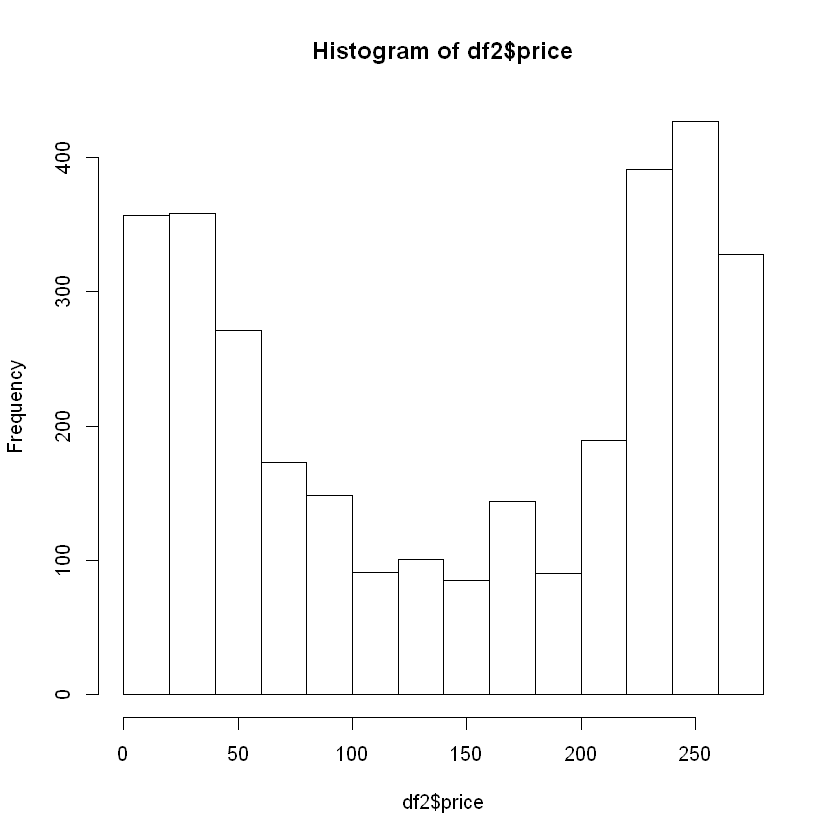

In [58]:
hist(df2$price)

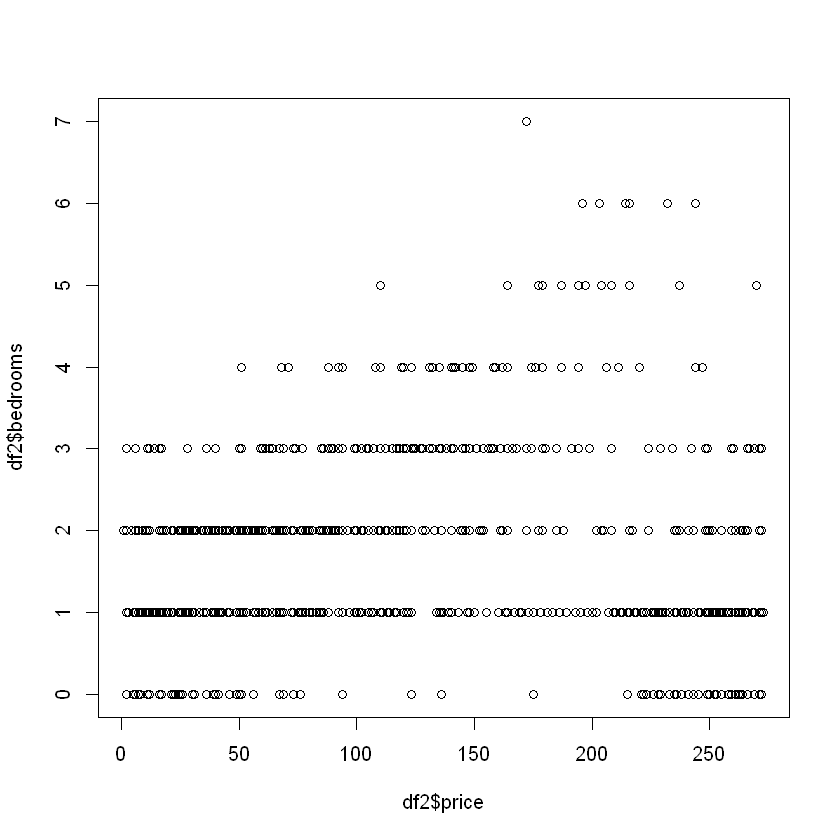

In [59]:
plot(df2$price, df2$bedrooms)

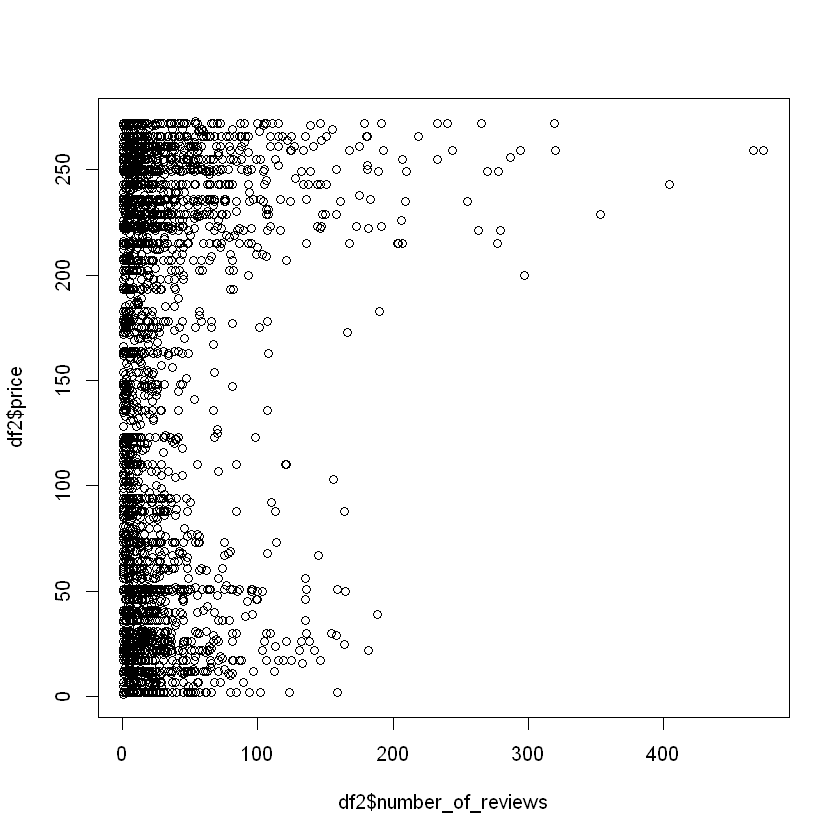

In [60]:
plot(df2$number_of_reviews, df2$price)

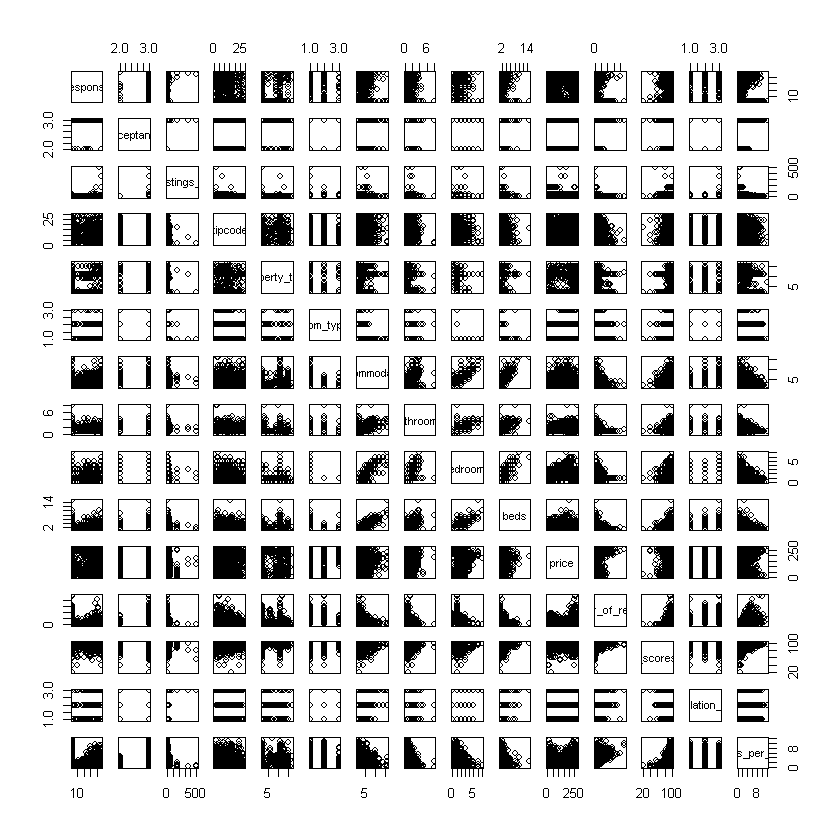

In [62]:
pairs(df2)

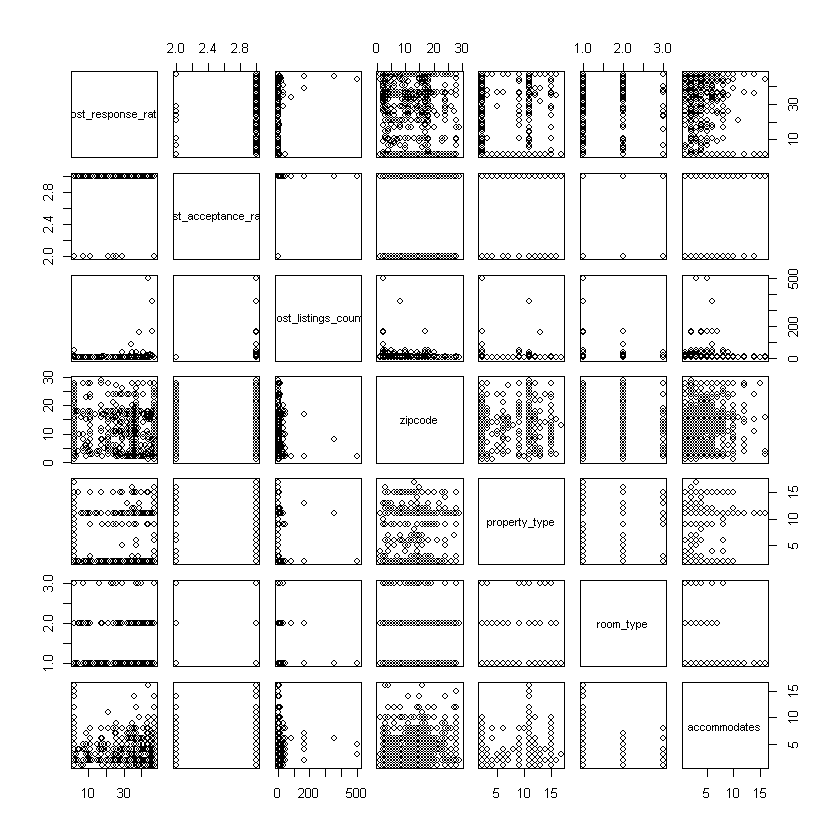

In [63]:
pairs(df2[1:7])

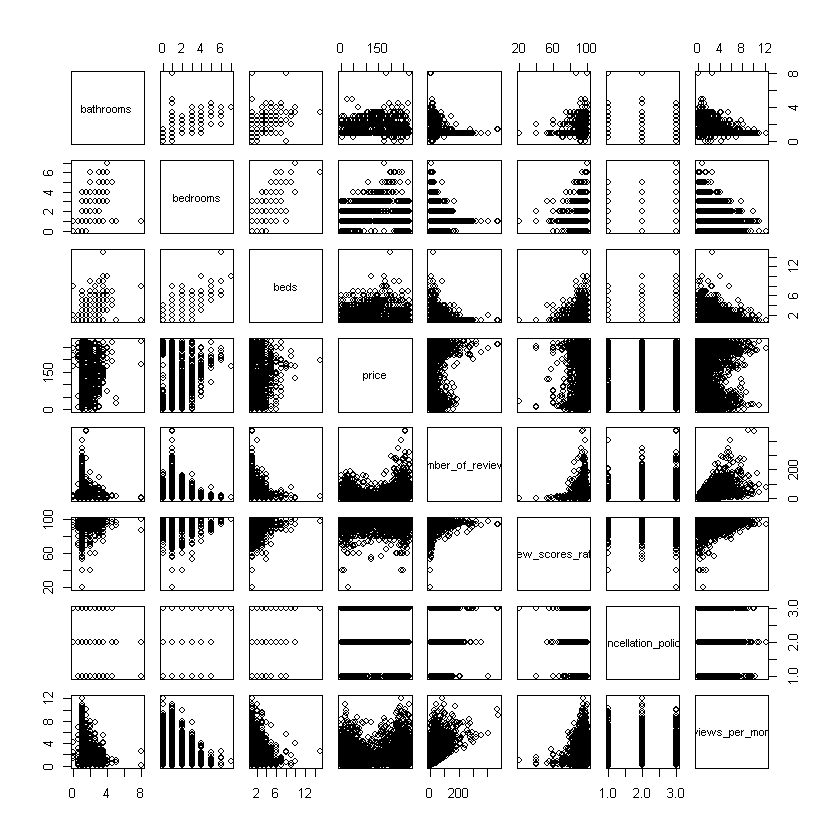

In [64]:
pairs(df2[8:15])

In [18]:
ggpairs(df2) 

ERROR: Error in ggpairs(df2): no se pudo encontrar la función "ggpairs"


### Integración de los datos

El objetivo de este apartado es integrar todos los datasets, cada uno con su interpretabilidad deseada en un único dataset. Tomaremos de base el dataset de casas de Airbnb sobre el cual agregaremos los datos del resto de datasets; para ello, realizamos los siguientes pasos.

#### Integración con  calendario de Airbnb

Añadimos al dataset de listings, la variable que nos indica una media de reservas al mes, para cuyo cálculo hay que recurrir al dataset calendar.

In [19]:
booking_per_month=vector(mode='numeric',length=3818)

In [20]:
airbnb_listings_def = data.frame(airbnb_listings_pre,booking_per_month)

In [21]:
max = nrow(airbnb_listings_def)

In [22]:
for(i in 1:max){
    id = airbnb_listings_def[c(i:i),c(1:1)]
    airbnb_listings_def[c(i:i),c(53:53)] = round((nrow(airbnb_calendar[airbnb_calendar['listing_id'] == id & airbnb_calendar['available'] == 'f',]))/12,digits=0)
}

In [24]:
head (airbnb_listings_def, n=5)

ERROR: Error in head(airbnb_listings_def, n = 5): object 'airbnb_listings_def' not found


#### Integración con  espacios culturales de Seattle

### Formateo de los datos

A continuación, realizaremos el formateo de los datos del dataset obtenido en el paso anterior con el objetivo de dar como salida de esta fase un dataset apropiado para la construcción de un modelo de predicción sobre él.